<<이미지 영상 변환 영역 처리>>
1. 허프변환
2. 코너 검출
3. k-최근접 이웃 분류기
4. 영상을 이용한 워핑과 모핑

1. 허프변환
  - 영상내의 선, 원, 임의형태를 지닌 물체를 감지하는 기술, 직선 검출에 사용한다.
  - 직교 좌표계로 표현되는 영상의 에지 점들을 극좌표계로 옮겨 검출하고자 하는 파라미터로 추출한다.

1-2. 허프변환의 단계
   1) 극 좌표계로 누적행렬
   2) 영상화소의 직선 검사
   3) 직선 좌표에 대한 극좌표 누적 행렬
   4) 누적 행렬의 지역 최댓값 선정
   5) 직선 선별 - 임계값 이상인 누적값 선택 및 내림차순으로 정렬

1-3. 허프변환의 활용
  - 직선검출 : 영상내에 공간 구조로 검출
  - 직선 검출 후 응용 : 차선, 장애물 자동인식 시스템 - 차선검출, 스캐너 기능 대신 앱[네개 모서리 검출], 음계 탐색
  - 문제점(직교좌표에 문제점) : 수직선일 경우에 기울기가 무한대
                                검출되는 직선의 간격이 동일하지 않아서 검출 속도 및 정밀도에서 문제가 발생 가능

2. 코너 검출 : 영상에서 경계가 만나는 지점의 특정한 모양을 갖는 곳을 가르킨다.
  - 코너 정보들 중에서 영상의 왜곡에도 불변하는 특징을 가진 지점들이 영상 매칭에 사용된다.
  - 해리스 코너 검출 : 영상의 평행이동, 회전변화 불변(invariant), 어파인(affine)변환, 조명 변화도 추출할 수 있다.

3. 동영상 로드 : cv2.VideoCapture : help(cv2.VideoCapture)
                 cv2.accumulateWeighted(src, dst, alpha[, mask]) -> dst
                 cv2.absdiff(src1,src2[, dst]) -> dst
                 cv2.threshold(src, thresh, maxval, tyoe[, dst]) -> retval, dst
                 cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
                 cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]])->image
                 
4. 카메라 가져오기
5. 동영상 사이즈, FPS, 프레임 리턴, 설정
6. 영상 녹화(웹카메라)
7. SAD,SSD,NCC

In [1]:
# 모듈을 임포트
import numpy as np
import cv2

filepath = "c:\\opencv_test\\01_people.avi"
#동영상로드
cp = cv2.VideoCapture(filepath)
while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    #확인
    if ret:
        cv2.imshow("MyFrame",frame)
        cv2.waitKey(1)
        
    else:
        cp.release()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# 모듈을 임포트
# ex02) 동영상 로드를 해서 움직임을 포착해보자.

import numpy as np
import cv2

filepath = "c:\\opencv_test\\1output.avi"
#동영상로드
cp = cv2.VideoCapture(filepath)

avg = None
while True :
    ret, frame = cp.read()
    if not ret:
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if avg is None:
        avg = gray.copy().astype("float") #이미지 영상의 ndarray를 float로 변환 후 반복 실행
        continue
        
    cv2.accumulateWeighted(gray,avg,0.6)
    fromDelta = cv2.absdiff(gray, cv2.convertScaleAbs(avg))
    
    thresh = cv2.threshold(fromDelta, 3, 255, cv2.THRESH_BINARY)[1]
    contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    frame = cv2.drawContours(frame, contours, -1, (0,255,0),3)
    
    cv2.imshow("MyFrame",frame)
    cv2.waitKey(1)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

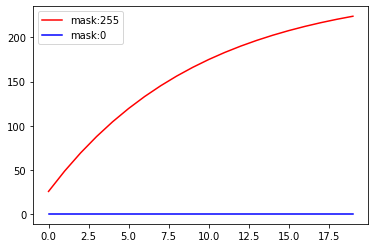

In [14]:
#ew03) cv2.accmulateWeighted(src,dst,alpha[,mask])
#대상이미지를 만들어서 가중평균을 원하는 색깔로 요청해보자.

import numpy as np
import cv2
from matplotlib import pyplot as plt

accuimg = np.zeros(2,dtype = np.float32)
img = np.empty((0,2))

#mask
mask = np.array([255,0],dtype = np.uint8)

for i in range(20):
    newimg = np.array([255,255],dtype = np.float32)
    cv2.accumulateWeighted(newimg,accuimg,0.1,mask = mask)
    img = np.append(img, [accuimg], axis = 0)
        
plt.plot(img[:,0], label = "mask:255", color = "red")
plt.plot(img[:,1], label = "mask:0", color = "blue")
plt.legend()

# accumulateWeighted()를 실행하게 될 경우 mask데이터에서 지정된 값에 따라
# 0이 지정된 픽셀은 가중 평균이 되지 않고 이전값이 저장, 1이 지정된 픽셀은 가중 평균된 값이
# 업데이트가 된다.

In [ ]:
#ex04) 카메라 가져오기
import numpy as np
import cv2

#동영상로드
cp = cv2.VideoCapture(0)
while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    #확인
    if ret:
        cv2.imshow("MyFrame",frame)
        cv2.waitKey(1)
        
    else:
        cp.release()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2

filepath = "c:\\opencv_test\\01_people.avi"
#동영상로드
cp = cv2.VideoCapture(filepath)

#속성값을 확인해보자
width = cp.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cp.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cp.get(cv2.CAP_PROP_FPS)
frame_num = cp.get(cv2.CAP_PROP_FRAME_COUNT)

print(width,height,fps,frame_num)

play_time = frame_num/fps
print("play_time [sec]",play_time)

640.0 480.0 24.0 497.0
play_time [sec] 20.708333333333332


In [3]:
#ex05) 비디오 속성값을 변경한  avi를 실행해보자
import numpy as np
import cv2

filepath = "c:\\opencv_test\\01_people.avi"
#동영상로드
cp = cv2.VideoCapture(filepath)

print(cp.set(cv2.CAP_PROP_FRAME_WIDTH,50))
print(cp.set(cv2.CAP_PROP_FRAME_HEIGHT,400))
print(cp.set(cv2.CAP_PROP_FPS,20))

print(cp.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cp.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(cp.get(cv2.CAP_PROP_FPS))

while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    #확인
    if ret:
        cv2.imshow("MyFrame",frame)
        cv2.waitKey(1)
        
    else:
        cp.release()

cv2.waitKey(0)
cv2.destroyAllWindows()

False
False
False
640.0
480.0
24.0


In [4]:
#ex05) 비디오 캠을 실행해서 속성값을 리턴받아보자
import numpy as np
import cv2

#filepath = "c:\\opencv_test\\01_people.avi"
#동영상로드
cp = cv2.VideoCapture(0)

print(cp.set(cv2.CAP_PROP_FRAME_WIDTH,50))
print(cp.set(cv2.CAP_PROP_FRAME_HEIGHT,400))
print(cp.set(cv2.CAP_PROP_FPS,10))

#print(cp.get(cv2.CAP_PROP_FRAME_WIDTH))
#print(cp.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(cp.get(cv2.CAP_PROP_FPS))

while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    #확인
    if ret:
        cv2.imshow("MyFrame",frame)
        cv2.waitKey(1)
        
    else:
        cp.release()

cv2.waitKey(0)
cv2.destroyAllWindows()

True
True
True
30.0


KeyboardInterrupt: 

In [3]:
#ex07)영상 녹화를 해보자 cv2.VideoWriter(filename, fourcc, fps, frameSize[, isColor])
import numpy as np
import cv2

cp = cv2.VideoCapture(0)
fps = 30
size = (640,480)

#동영상 설정 출력파일

fourcc = cv2.VideoWriter_fourcc(*'XVID') # ('X','V','I','D')
video = cv2.VideoWriter('c:\\opencv_test\\1output.avi',fourcc,fps,size)

while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    #확인
    
    if ret:
        cv2.imshow("MyFrame",frame)
        video.write(frame)
        if cv2.waitKey(1) == ord('q'):
            break

cp.release()
video.release()

cv2.destroyAllWindows()

In [5]:
from __future__ import print_function
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This program shows how to use background subtraction methods provided by \
                                              OpenCV. You can process both videos and images.')
parser.add_argument('--input', type=str, help='Path to a video or a sequence of image.', default='c:\\opencv_test\\1output.avi')
parser.add_argument('--algo', type=str, help='Background subtraction method (KNN, MOG2).', default='MOG2')
args = parser.parse_args()
if args.algo == 'MOG2':
    backSub = cv.createBackgroundSubtractorMOG2()
else:
    backSub = cv.createBackgroundSubtractorKNN()
capture = cv.VideoCapture(cv.samples.findFileOrKeep(args.input))
if not capture.isOpened:
    print('Unable to open: ' + args.input)
    exit(0)
while True:
    ret, frame = capture.read()
    if frame is None:
        break
    
    fgMask = backSub.apply(frame)
    
    
    cv.rectangle(frame, (10, 2), (100,20), (255,255,255), -1)
    cv.putText(frame, str(capture.get(cv.CAP_PROP_POS_FRAMES)), (15, 15),
               cv.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    
    cv.imshow('Frame', frame)
    cv.imshow('FG Mask', fgMask)
    
    keyboard = cv.waitKey(30)
    if keyboard == 'q' or keyboard == 27:
        break

usage: ipykernel_launcher.py [-h] [--input INPUT] [--algo ALGO]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Lim C S\AppData\Roaming\jupyter\runtime\kernel-8ef0b2a3-2003-48bf-997a-8d0e383cd492.json


SystemExit: 2

In [6]:
import numpy as np
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This sample demonstrates the meanshift algorithm. \
                                              The example file can be downloaded from: \
                                              https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4')
parser.add_argument('image', type=str, help='path to image file')
args = parser.parse_args()
cap = cv.VideoCapture(args.image)
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)
# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break

usage: ipykernel_launcher.py [-h] image
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

In [1]:
import numpy as np
import cv2
import time

i = 0 # 카운트 변수
th = 30 # 차분 이미지의 한계

cap = cv2.VideoCapture("c:\\opencv_test\\01_people.avi")  #동영상 파일 캡처

ret, bg = cap.read()  # 첫번째 프레임을 배경 이미지로 설정

#그레이 스케일 변환
bg = cv2.cvtColor(bg,cv2.COLOR_BGR2GRAY)

while(cap.isOpened()):
    #프레임 취득
    ret, frame = cap.read()
    
    #그레이 스케일 변환
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    #차이의 절대 값을 계산
    mask = cv2.absdiff(gray,bg)
    
    #차등 이미지를 두값의 마스크 이미지를 산출
    mask [ mask < th] = 0
    mask[mask >= th] = 255
    
    #프레임과 마스크 이미지보기
    cv2.imshow("Mask",mask)
    cv2.imshow("Frame",gray)
    cv2.imshow("BackGround",bg)
    
    #대기 (0.03sec)
    time.sleep(0.03)
    i += 1 #카운트를 1 증가
    
    #배경 이미지 업데이트(간격)
    if (i>30):
        ret, bg = cap.read()
        bg = cv2.cvtColor(bg,cv2.COLOR_BGR2GRAY)
        i = 0 #카운트 변수의 초기화
        
    if cv2.waitKey(1) & 0xFF == ord('q') : # q키를 누를 때 도중에 종료
        break
        
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [2]:
#ex10) 감시카메라 등에서 움직이는 물체를 악성 물질이라 탐지하고 사진으로 찍어서 저장해보자.
#1. 차분법을 이용한 함수로 생성 MyFrame_sub(frame1, frame2, frame3)
import cv2
import numpy as np

def MyFrame_sub(frame1, frame2, frame3, th):
    #1-1 프레임의 절대 차이 값 지정
    diff01 = cv2.absdiff(frame1, frame2)
    diff02 = cv2.absdiff(frame2, frame3)
    
    #1-2 차분 이미지 교집합
    diff_res = cv2.bitwise_and(diff01, diff02)
    
    #차등 이미지를 두 값의 마스크 이미지를 산출
    diff_res [ diff_res < th] = 0
    diff_res[diff_res >= th] = 255
    
    #블러링 작업
    mask = cv2.medianBlur(diff_res,5)
    return diff_res
    
#2. 악성물질(의심물체)을 판정값
fw = 1000

#3. 카메라 연결
cap = cv2.VideoCapture(0)  #동영상 파일 캡처

#4. 프레임 세개를 지정한 후 흑백으로 변경
f1 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
f2 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
f3 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)

CNT = 0  #반복문안에 파일이름으로 카운트,, frame0.jpg, frame1.jpg

while cap.isOpened():
#5. 영상을 읽어서 MyFrame_sub(frame1,frame2,frame3)으로 차분을 한다.
    mask = MyFrame_sub(f1,f2,f3,th = 10)
    
#6. 5번의 결과로 얻은 이미지 하얀색만 픽셀수를 추출 cv2.countNonZero()
    res = cv2.countNonZero(mask)

#7. 6번의 결과값이 2번 fw보다 의심물체로 판정후 이미지 저장
    if res > fw :
        print("의심된다 저 물체 : ",CNT)
        filename = "c:\\mytest\\frame" + str(CNT)+".jpg"
        cv2.imwrite(filename,f2)
        CNT += 1

#8. 프레임을 확인
    cv2.imshow("Frame2",f2)
    cv2.imshow("Mask",mask)
    
#9 배경 이미지 업데이트(간격)
    f1 = f2
    f2 = f3
    f3 = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
            
    if cv2.waitKey(1) & 0xFF == ord('q') : # q키를 누를 때 도중에 종료
        break
        
cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()

의심된다 저 물체 :  0
의심된다 저 물체 :  1
의심된다 저 물체 :  2
의심된다 저 물체 :  3
의심된다 저 물체 :  4
의심된다 저 물체 :  5
의심된다 저 물체 :  6
의심된다 저 물체 :  7
의심된다 저 물체 :  8
의심된다 저 물체 :  9
의심된다 저 물체 :  10
의심된다 저 물체 :  11
의심된다 저 물체 :  12
의심된다 저 물체 :  13
의심된다 저 물체 :  14
의심된다 저 물체 :  15
의심된다 저 물체 :  16
의심된다 저 물체 :  17
의심된다 저 물체 :  18
의심된다 저 물체 :  19
의심된다 저 물체 :  20
의심된다 저 물체 :  21
의심된다 저 물체 :  22
의심된다 저 물체 :  23
의심된다 저 물체 :  24
의심된다 저 물체 :  25
의심된다 저 물체 :  26
의심된다 저 물체 :  27
의심된다 저 물체 :  28
의심된다 저 물체 :  29
의심된다 저 물체 :  30
의심된다 저 물체 :  31
의심된다 저 물체 :  32
의심된다 저 물체 :  33
의심된다 저 물체 :  34
의심된다 저 물체 :  35
의심된다 저 물체 :  36
의심된다 저 물체 :  37
의심된다 저 물체 :  38
의심된다 저 물체 :  39
의심된다 저 물체 :  40
의심된다 저 물체 :  41
의심된다 저 물체 :  42
의심된다 저 물체 :  43
의심된다 저 물체 :  44
의심된다 저 물체 :  45
의심된다 저 물체 :  46
의심된다 저 물체 :  47
의심된다 저 물체 :  48
의심된다 저 물체 :  49
의심된다 저 물체 :  50
의심된다 저 물체 :  51
의심된다 저 물체 :  52
의심된다 저 물체 :  53
의심된다 저 물체 :  54
의심된다 저 물체 :  55
의심된다 저 물체 :  56
의심된다 저 물체 :  57
의심된다 저 물체 :  58
의심된다 저 물체 :  59
의심된다 저 물체 :  60
의심된다 저 물체 :  61
의심된다 저 물체 :  62
의심

의심된다 저 물체 :  489
의심된다 저 물체 :  490
의심된다 저 물체 :  491
의심된다 저 물체 :  492
의심된다 저 물체 :  493
의심된다 저 물체 :  494
의심된다 저 물체 :  495
의심된다 저 물체 :  496
의심된다 저 물체 :  497
의심된다 저 물체 :  498
의심된다 저 물체 :  499
의심된다 저 물체 :  500
의심된다 저 물체 :  501
의심된다 저 물체 :  502
의심된다 저 물체 :  503
의심된다 저 물체 :  504
의심된다 저 물체 :  505
의심된다 저 물체 :  506
의심된다 저 물체 :  507
의심된다 저 물체 :  508
의심된다 저 물체 :  509
의심된다 저 물체 :  510
의심된다 저 물체 :  511
의심된다 저 물체 :  512
의심된다 저 물체 :  513
의심된다 저 물체 :  514
의심된다 저 물체 :  515
의심된다 저 물체 :  516
의심된다 저 물체 :  517
의심된다 저 물체 :  518
의심된다 저 물체 :  519
의심된다 저 물체 :  520
의심된다 저 물체 :  521
의심된다 저 물체 :  522
의심된다 저 물체 :  523
의심된다 저 물체 :  524
의심된다 저 물체 :  525
의심된다 저 물체 :  526
의심된다 저 물체 :  527
의심된다 저 물체 :  528
의심된다 저 물체 :  529
의심된다 저 물체 :  530
의심된다 저 물체 :  531
의심된다 저 물체 :  532
의심된다 저 물체 :  533
의심된다 저 물체 :  534
의심된다 저 물체 :  535
의심된다 저 물체 :  536
의심된다 저 물체 :  537
의심된다 저 물체 :  538
의심된다 저 물체 :  539
의심된다 저 물체 :  540
의심된다 저 물체 :  541
의심된다 저 물체 :  542
의심된다 저 물체 :  543
의심된다 저 물체 :  544
의심된다 저 물체 :  545
의심된다 저 물체 :  546
의심된다 저 물체 :  5

영상(동적인 이미지)인 상황에서 이동물체 감지_컬러추적
 - HSV 색공간을 활용한다.
 - ex) 빨강의 범위를 살펴보자
   빨강의 범위        OPENCV 빨강의 범위
H  0~60,300~360도     0~30, 150~179
S  50~100%            128~255
V  0~100%             0~255


In [1]:
import numpy as np
import cv2
#ex11) Hsv형식의 컬러를 이용해서 물체감지를 해보자
#1. 사용자 함수를 생성한 다음 넘겨받은 이미지를 hsv컬러 공간을 만들자., [빨강]

def myColor(img):
    #1-1. img의 색공간을 hsv로 변경
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #1-2 HSV 영역에서 빨강색 공간 치역 1
    hsv_min = np.array([0,127,0])
    hsv_max = np.array([179,255,255])
    mask1 = cv2.inRange(hsv_img,hsv_min,hsv_max)
    
    #1-2 HSV 영역에서 빨강색 공간 치역 2
    hsv_min = np.array([150,127,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv_img,hsv_min,hsv_max)
    return (mask1 + mask2)

#2. 카메라 캡처

filepath = "c:\\opencv_test\\01_people.avi"
#동영상로드
cp = cv2.VideoCapture(filepath)
while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    
    #3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res = myColor(frame)
    
    #4. 결과 보기
    cv2.imshow("MyFrame",frame)
    cv2.imshow("Mask",mask_res)
    
    if cv2.waitKey(1) & 0xFF == ord('q') : # q키를 누를 때 도중에 종료
        break
        
cp.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-i1s8y2i1\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
import numpy as np
import cv2
import time
# ex12) Hsv형식의 컬러를 이용해서 물체 감지를 해보자 .움직이는 대상에 원하는 위치에 동그라미를 그려서
# 위치를 csv에 파일 저장해보자
# connectedComponentsWithStats(image[, labels[, stats[, centroids[, connectivity[, ltype]]]]]) -> retval, labels, stat
#          s, centroids

# 1. 사용자 함수를 생성한다음  넘겨받은 이미지를  hvs컬러 공간을 만들자.  [빨강]
def myColor(img):
    #1-1. img의 색공간을 hsv로 변경
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    #1-2 HSV 영역에서 빨강색 공간 치역 1
    hsv_min = np.array([0,127,0])
    hsv_max = np.array([30,255,255])
    mask1 = cv2.inRange(hsv_img,hsv_min,hsv_max)
    
    #1-3 HSV 영역에서 빨강색 공간 치역 2
    hsv_min = np.array([150,127,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv_img,hsv_min,hsv_max)
    return mask1 + mask2
''' 
    #1-4. 지정된 마스크 구현 cv2.dilate(), cv2.erode()
    mask = mask1 + mask2
    kernel = np.ones((6,6),np.uint8)
    mask = cv2.dilate(mask,kernel)
    mask = cv2.erode(mask,kernel)
    return mask
'''

#추가 함수 connectedComponentsWithStats()
def my_calc(mask):
    if np.count_nonzero(mask) <= 0:
        return (-20,-20)
    
    label = cv2.connectedComponentsWithStats(mask)
    n = label[0]-1
    data = np.delete(label[2],0,0)
    center = np.delete(label[3],0,0)
    max_index = np.argmax(data[:,4])
    return center[max_index]

#2. 카메라 캡처

filepath = "c:\\opencv_test\\01_people.avi"
#동영상로드
cp = cv2.VideoCapture(0)
data = []
start = time.time()
while(cp.isOpened()):
    #프레임으로 리턴
    ret, frame = cp.read()
    
    #3. 데이터 읽어서 1번의 함수를 통해 값을 변환 [빨강영역 추출]
    mask_res = myColor(frame)
    x,y = my_calc(mask_res)
    data.append([time.time()-start,x,y])
    
    #3-1 동그라미 그리자
    cv2.circle(frame, (int(x),int(y)),20,(0,0,255),10)
    
    #4. 결과 보기
    cv2.imshow("MyFrame",frame)
    cv2.imshow("Mask",mask_res)
    
    if cv2.waitKey(1) & 0xFF == ord('q') : # q키를 누를 때 도중에 종료
        break

    #5. 파일저장
    np.savetxt("c:\\mytest\\data.csv",np.array(data),delimiter = ",")
    
cp.release()
cv2.destroyAllWindows()